### This demo analysis seeks to identify trends and insights of product sales.

Using data from Kaggle

REC corp LTD. is small-scaled business venture established in India. 
They have been selling FOUR PRODUCTS for OVER TEN YEARS.

The products are P1, P2, P3 and P4.
They have collected data from their retail centers and organized it into a small csv file:

Q1- Total unit sales of product 1
Q2- Total unit sales of product 2
Q3- Total unit sales of product 3
Q4- Total unit sales of product 4

S1- Total revenue from product 1
S2- Total revenue from product 2
S3- Total revenue from product 3
S4- Total revenue from product 4

-------------------------------------------------------------------------------------
Workflow:

1. Basic set up - importing library and dataset
2. Data clean up and integration
3. Exploratory Data Analysis (EDA)
4. Observations
5. Further Applications

### Basic Set Up - importing library and dataset

1. import library and dataset
2. verify data set integrity
3. drop irrelevant col
4. convert obj.date to operable num
5. prep for EDA

In [2]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Open dataset
data = pd.read_csv('test_statistics.csv')

In [3]:
# Checking the first 5 and last 5 rows of the dataset
data.head(-1)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4594,4594,29-01-2023,1227,3044,5510,1896,3889.59,19298.96,29864.20,13518.48
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62


In [7]:
# dropping 'Unnamed:0' column; it is not useful
data = data.drop(columns='Unnamed: 0')
data

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21


In [8]:
#checking data value type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4600 non-null   object 
 1   Q-P1    4600 non-null   int64  
 2   Q-P2    4600 non-null   int64  
 3   Q-P3    4600 non-null   int64  
 4   Q-P4    4600 non-null   int64  
 5   S-P1    4600 non-null   float64
 6   S-P2    4600 non-null   float64
 7   S-P3    4600 non-null   float64
 8   S-P4    4600 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 323.6+ KB


In [9]:
#checking for null data
data.isnull().sum()

Date    0
Q-P1    0
Q-P2    0
Q-P3    0
Q-P4    0
S-P1    0
S-P2    0
S-P3    0
S-P4    0
dtype: int64

In [11]:
#extracting date from obj to year, month, date
data['Day'] = data['Date'].apply(lambda x: x.split('-')[0])
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['Year'] = data['Date'].apply(lambda x: x.split('-')[2])

#dropping 2010 and 2023 (incomplete data cols)
data_reduced = data.query("Year != '2010' and Year != '2023'")

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


In [16]:
#renaming columns so it actually makes sense

data_reduced.rename(columns = {'Q-P1':'Total Unit Sales of P1',
                               'Q-P2':'Total Unit Sales of P2',
                               'Q-P3':'Total Unit Sales of P3',
                               'Q-P4':'Total Unit Sales of P4',
                               'S-P1':'Total Revenue from P1',
                               'S-P2':'Total Revenue from P2',
                               'S-P3':'Total Revenue from P3',
                               'S-P4':'Total Revenue from P4'
}, inplace = True)
data_reduced

,Date,Total Unit Sales of P1,Total Unit Sales of P2,Total Unit Sales of P3,Total Unit Sales of P4,Total Revenue from P1,Total Revenue from P2,Total Revenue from P3,Total Revenue from P4,Day,Month,Year
201,01-01-2011,281,3956,4186,1537,890.77,25081.04,22688.12,10958.81,01,01,2011
202,02-01-2011,7665,1350,4266,1789,24298.05,8559.00,23121.72,12755.57,02,01,2011
203,03-01-2011,937,3758,4311,314,2970.29,23825.72,23365.62,2238.82,03,01,2011
204,04-01-2011,6378,968,4530,995,20218.26,6137.12,24552.60,7094.35,04,01,2011
205,05-01-2011,731,2174,5908,1505,2317.27,13783.16,32021.36,10730.65,05,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
4561,26-12-2022,7600,662,4510,988,24092.00,4197.08,24444.20,7044.44,26,12,2022
4562,27-12-2022,7114,2948,681,700,22551.38,18690.32,3691.02,4991.00,27,12,2022
4563,28-12-2022,7759,356,1834,1142,24596.03,2257.04,9940.28,8142.46,28,12,2022
4564,29-12-2022,6457,1851,3369,669,20468.69,11735.34,18259.98,4769.97,29,12,2022


### EDA

1. Create a function for making bar chart for all four products + make bar charts
2. Total and Mean revenue of sales for each product

In [14]:
# function name = plot_bc

def plot_bc(df, columns, sale, year, val):
    # aggregate by sum or mean
    if val == 'sum':
        sales_by_year = df.groupby('Year')[columns].sum().reset_index()
    elif val == 'mean':
        sales_by_year = df.groupby('Year')[columns].mean().reset_index()

    sales_by_year_m = pd.melt(sales_by_year,id_vars='Year', value_vars = columns, var_name = 'Product', value_name = 'Sales')
    
    # Create a bar chart
    plt.figure(figsize=(20,4))
    sns.barplot(data=sales_by_year_m, x='Year', y='Sales', hue='Product') #,palette="cividis")
    plt.xlabel('Year')
    plt.ylabel(sale)
    plt.title(f'{sale} by {year}')
    plt.xticks(rotation=45)
    plt.show()

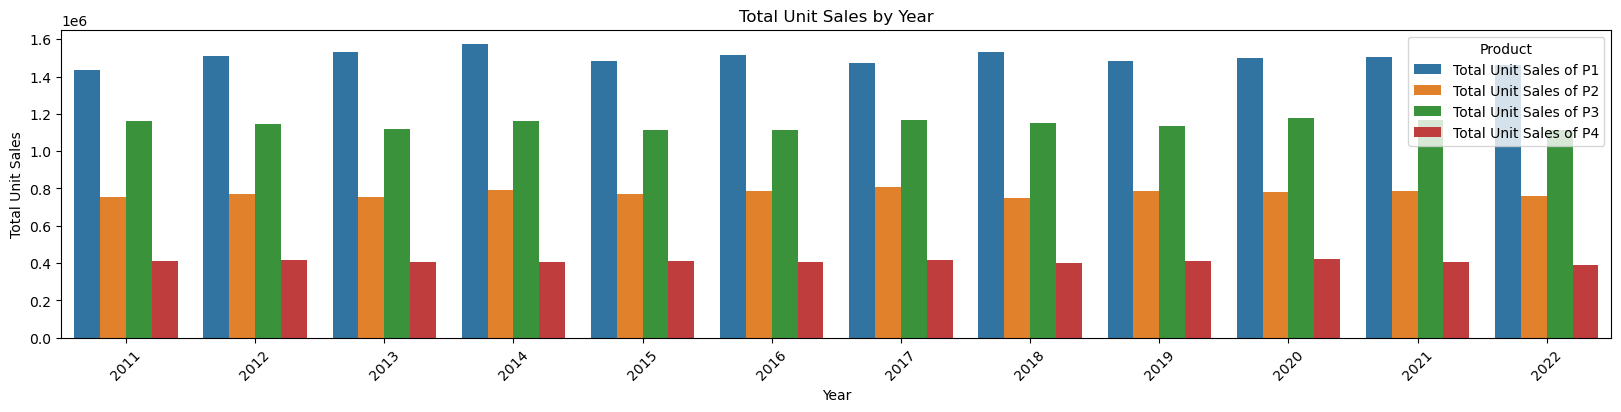

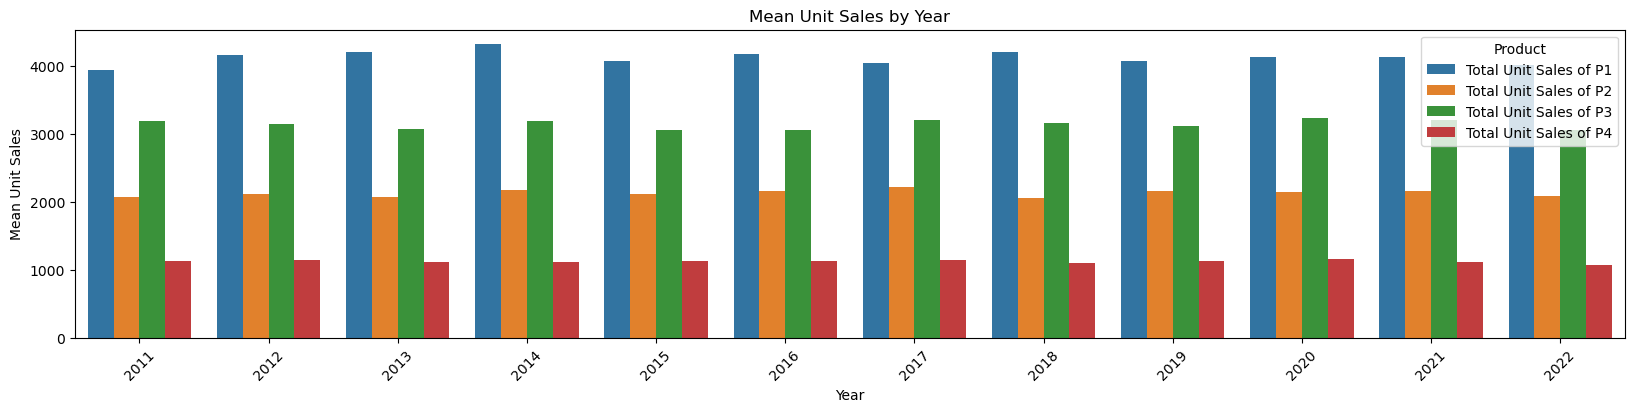

In [17]:
#use the plot_bar_chart function, enter the Unit Sales Columns and the Unit Sales string
plot_bc(data_reduced, 
        ['Total Unit Sales of P1','Total Unit Sales of P2','Total Unit Sales of P3','Total Unit Sales of P4'],
        'Total Unit Sales', 
        'Year', 
        'sum')

plot_bc(data_reduced, 
        ['Total Unit Sales of P1','Total Unit Sales of P2','Total Unit Sales of P3','Total Unit Sales of P4'],
        'Mean Unit Sales', 
        'Year', 
        'mean')

#### Observations

Ranking from highest sales to lowest:
1. P1 - record on 2014
2. P3
3. P2
4. P4

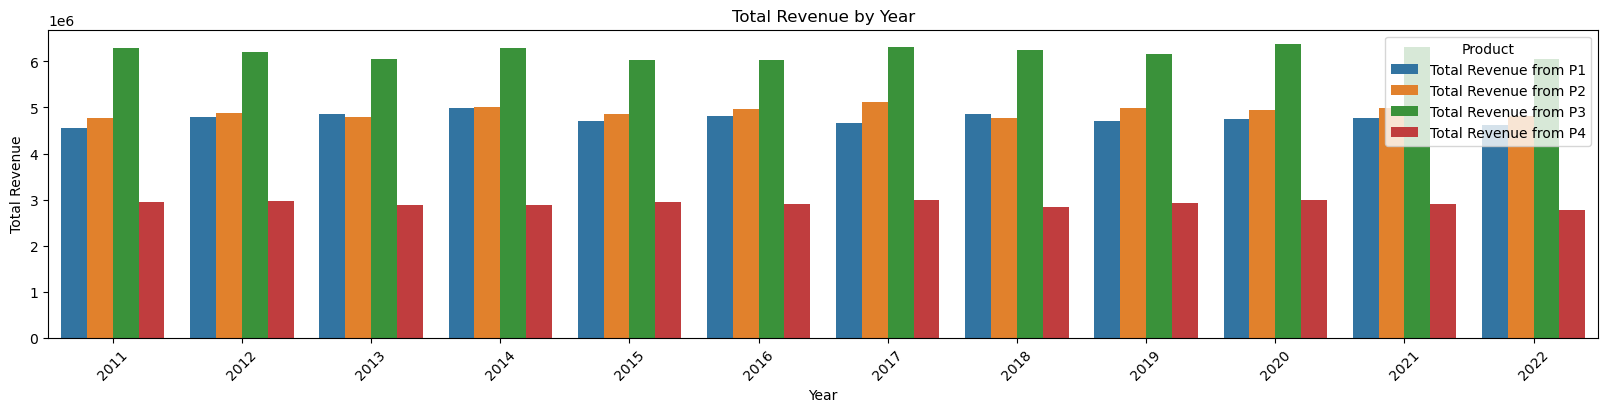

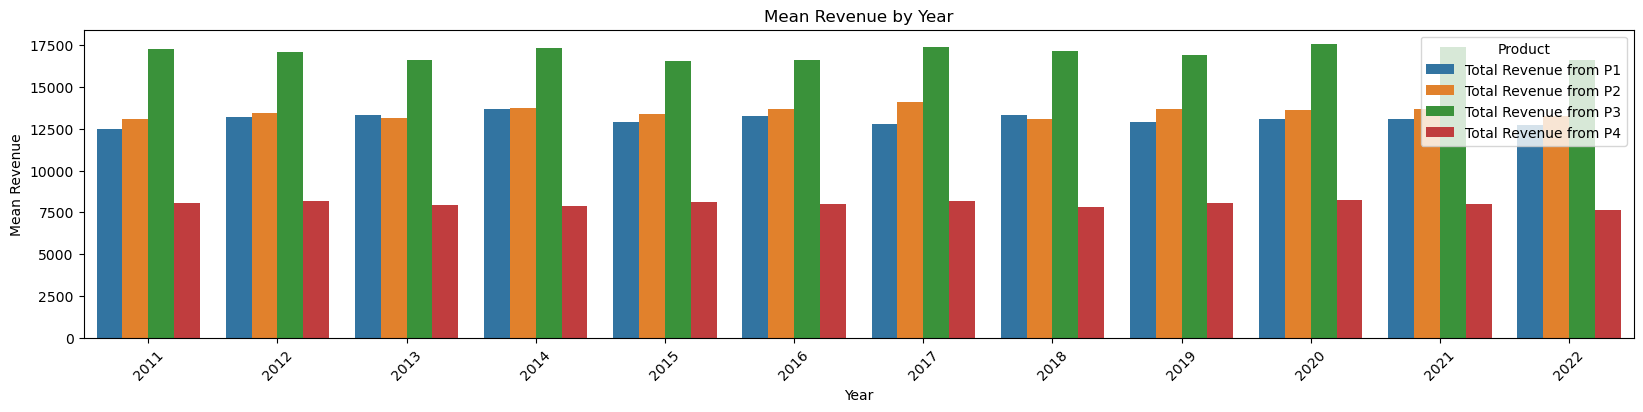

In [18]:
#use the plot_bar_chart function, enter the Unit Sales Columns and the Unit Sales string
plot_bc(data_reduced, 
        ['Total Revenue from P1','Total Revenue from P2','Total Revenue from P3','Total Revenue from P4'],
        'Total Revenue', 
        'Year', 
        'sum')

plot_bc(data_reduced, 
        ['Total Revenue from P1','Total Revenue from P2','Total Revenue from P3','Total Revenue from P4'],
        'Mean Revenue', 
        'Year', 
        'mean')

In [40]:
### Price per product

def ppp(df,year,product):
    
    df_year = df.loc[df['Year']==year]
    
    year_unit = df_year['Total Unit Sales of ' + product].sum()
    year_rev = df_year['Total Revenue from ' + product].sum()
    
    
    product_price = year_rev/year_unit
    return product_price

# quick example analysis of pricings on 2011 

p1_2011 = ppp(data_reduced,'2011','P1')
p2_2011 = ppp(data_reduced,'2011','P2')
p3_2011 = ppp(data_reduced,'2011','P3')
p4_2011 = ppp(data_reduced,'2011','P4')

df_2011_prices = {'P1 Price':p1_2011,
                  'P2 Price':p2_2011,
                  'P3 Price':p3_2011,
                  'P4 Price':p4_2011}

df_2011_prices

{'P1 Price': 3.1699999999999995,
 'P2 Price': 6.339999999999999,
 'P3 Price': 5.419999999999999,
 'P4 Price': 7.13}

#### Observations

Ranking from highest revenue to lowest:
1. P3
2. P3
3. P1
4. P4

P3 despite being on no.2 of sales, brought in the most revenue. 
- determine the factors playing into this trend; P3 has the second lowest price compared to the others

P1 and P2 brought in similar revenues for each year; with P1, despite being most sold, bringing in second lowest revenue eac year.
- may be good to revisit its pricing; it is far cheaper than others

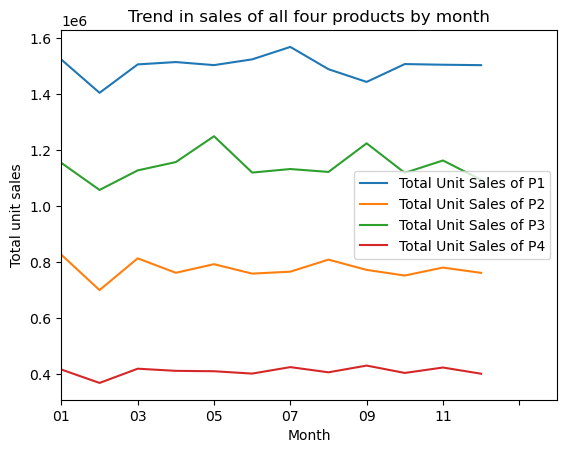

In [42]:
# Replace all entries of '9' in the Month column with '09'
data_reduced['Month'] = data['Month'].replace('9', '09')

# Create a figure and axis
def month_plot():
    fig, ax = plt.subplots()

    # Plot the sales data for each product by month
    data_reduced.groupby('Month')[ ['Total Unit Sales of P1','Total Unit Sales of P2','Total Unit Sales of P3','Total Unit Sales of P4']].sum().plot(ax=ax)

    # Set the x-axis limits to only show up to December
    ax.set_xlim(left=0, right=13)

    # Set the axis labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Total unit sales')
    ax.set_title('Trend in sales of all four products by month')

    # Show the plot
    plt.show()

month_plot()